# 1 . PERCEPTRON

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import json
import threading
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

# 1.1 perceptron test withOUT regularisation learns mean function

In [ ]:
np.random.seed(42)
class perceptron_model:
    """
    we need
    input, weights and learning rate
    """
    def __init__(self, learning_rate=0.8 , epochs=200 ):
        self.learning_rate= learning_rate
        self.epochs = epochs
        self.cache= defaultdict(list)

    def sigmoid(self , X):
        return 1 / ( 1 + np.exp(-X))

    def loss(self , y_true , y_pred ):
        # print(y_true.shape[0])
        n = y_true.shape[0]
        e = y_true - y_pred
        loss = 1/(2 * n ) * np.sum( np.square( e ))
        return loss

    def weight_update(self, y_true , y_pred):
        n = y_true.shape[0]
        delta_W =   self.learning_rate / n *  np.dot( ( y_true - y_pred )  , self.X )
        delta_B =  self.learning_rate  * np.mean(( y_true - y_pred ))
        self.bias += delta_B
        self.weights += delta_W

    def train(self , X , Y ):
        self.cache.clear()
        self.X = X
        self.Y = Y
        self.input_size = self.X.shape
        # Xavier initialisation
        self.weights = np.random.normal(0, np.sqrt( 1 / self.input_size[1] ) , size=self.input_size[1] )
        self.bias= 0
        output = None
        for epoch in range(self.epochs):
            state = np.dot( self.weights , self.X.T ) + self.bias
            activation = self.sigmoid( state )
            self.cache["states"].append(output)
            self.cache["activations"].append(activation)
            self.cache["Losses"].append( self.loss( self.Y , activation ) )
            self.weight_update( self.Y , activation )
            print( f"the loss for epoch {1+epoch} is  { self.cache['Losses'][-1] }" )
        plt.plot( range(self.epochs) , self.cache["Losses"] )
        plt.xlabel('X-axis ,  epochs')
        plt.ylabel('Y-axis ,  Loss')

    def test(self, y_test ):
        self.y_pred = np.dot( self.weights , y_test.T )  + self.bias
        return self.y_pred


In [ ]:

X = np.random.lognormal( 9 , 45 , size=[80 , 6] )
Y = np.mean( X,axis=1)
data = pd.DataFrame(X)
data.head()

,0,1,2,3,4,5
0,4.131046e+13,1.608853e+01,3.686298e+16,4.716351e+33,2.150463e-01,2.152052e-01
1,5.910223e+34,8.069013e+18,5.414948e-06,3.251156e+14,7.111508e-06,6.408797e-06
2,4.338903e+08,3.288009e-34,1.578145e-30,8.312346e-08,1.302078e-16,1.122187e+10
3,1.455148e-14,2.030690e-24,3.566097e+32,3.135070e-01,1.691886e+05,1.159946e-24
4,1.860552e-07,1.192445e+06,2.597127e-19,1.782425e+11,1.479848e-08,1.614381e-02


In [ ]:
data.insert( len(data.columns), len(data.columns) , Y)

In [ ]:
data.head()

,0,1,2,3,4,5,6
0,4.131046e+13,1.608853e+01,3.686298e+16,4.716351e+33,2.150463e-01,2.152052e-01,7.860585e+32
1,5.910223e+34,8.069013e+18,5.414948e-06,3.251156e+14,7.111508e-06,6.408797e-06,9.850371e+33
2,4.338903e+08,3.288009e-34,1.578145e-30,8.312346e-08,1.302078e-16,1.122187e+10,1.942626e+09
3,1.455148e-14,2.030690e-24,3.566097e+32,3.135070e-01,1.691886e+05,1.159946e-24,5.943494e+31
4,1.860552e-07,1.192445e+06,2.597127e-19,1.782425e+11,1.479848e-08,1.614381e-02,2.970728e+10


In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
data[: ,:-1].shape

(80, 6)

In [ ]:
data.shape

(80, 7)

In [ ]:
assert  0.39514757042074466 > 0.39514756978355536

the loss for epoch 1 is  0.7058280953630676
the loss for epoch 2 is  0.5232353661513355
the loss for epoch 3 is  0.4713368616204496
the loss for epoch 4 is  0.44531915128526256
the loss for epoch 5 is  0.4302415779736521
the loss for epoch 6 is  0.4209181425043802
the loss for epoch 7 is  0.41480209188723793
the loss for epoch 8 is  0.41058628929771573
the loss for epoch 9 is  0.4075596821302182
the loss for epoch 10 is  0.4053130939439119
the loss for epoch 11 is  0.4035989446658008
the loss for epoch 12 is  0.40226074272399925
the loss for epoch 13 is  0.40119576219332614
the loss for epoch 14 is  0.40033432552452947
the loss for epoch 15 is  0.39962780460720615
the loss for epoch 16 is  0.39904140409041505
the loss for epoch 17 is  0.3985496732414385
the loss for epoch 18 is  0.3981336304226715
the loss for epoch 19 is  0.39777887120465194
the loss for epoch 20 is  0.3974742936864651
the loss for epoch 21 is  0.39721122109340523
the loss for epoch 22 is  0.3969827860442311
the loss 

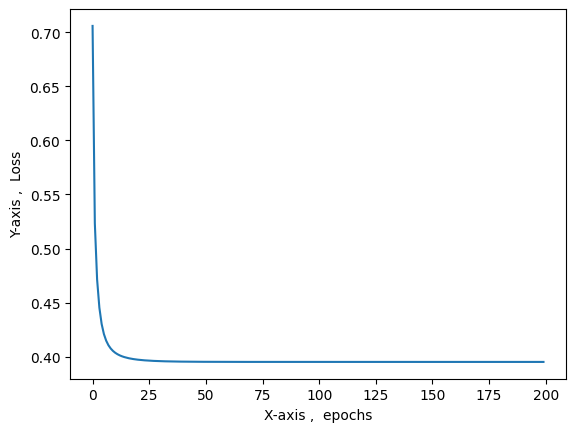

In [ ]:
model = perceptron_model(learning_rate=0.9)
model.train( data[: , :-1] , data[: ,-1])
# the loss for epoch 200 is  0.39514757042074466
# the loss for epoch 200 is  0.39514756978355536


# 2. BACKPROPAGATING GRADIENTS THROUGH TIME

In [ ]:
class RNN:
    """
    RNN implementation from staudemeyer et al
    """
    def __init__(self, learning_rate=0.5 , epochs=1000, hidden_units=10 ):
        self.learning_rate= learning_rate
        self.epochs = epochs
        self.hidden_units = hidden_units
        self.cache= defaultdict(list)

    def sigmoid(self , X):
        return 1 / ( 1 + np.exp(-X))

    def loss(self , y_true , y_pred ):

        n = self.input_size[0]

        e = y_true - y_pred

        loss = 1/(2 * n ) * np.sum( np.square( e ))

        return loss

    def weight_update(self):

        error_t  = 1/self.input_size[0] * self.cache["activations"][-1] * (1 - self.cache["activations"][-1] ) * ( self.Y[-1] - self.cache["activations"][-1] )

        delta_Wi = np.zeros( ( self.hidden_units , self.input_size[1] ) )

        delta_Wc = np.zeros( (self.hidden_units , self.hidden_units) )

        #Note to self, this can be replaced with np.outer

        for i,u in enumerate(error_t):

            #for each hidden unit sum up product of recurrent connections and respective unit error signal at that specific timestep. so we get an H size matrix containing sums of error signal into all previous inputs

            delta_Wc[i] += ( u * self.cache["activations"][-2] )

            delta_Wi[i] += ( u * self.X[-2] )

        for timestep in range( self.input_size[0]-2,0,-1  ):

            error_t = 1/self.input_size[0] * self.cache["activations"][timestep-1] * (1 - self.cache["activations"][timestep-1] ) * np.dot( self.context_weights , error_t )

            for i,u in enumerate(error_t):

                delta_Wc[i] += ( u * self.cache["activations"][timestep-1] )

                delta_Wi[i] += ( u * self.X[timestep-1] )


        self.input_weights += ( self.learning_rate * delta_Wi )

        self.context_weights += ( self.learning_rate *  delta_Wc )



    def train(self , X , Y ):
        self.cache.clear()
        self.X = X
        self.Y = Y
        self.input_size = self.X.shape

        # Glorot initialisation
        self.input_weights = np.random.randn(self.hidden_units, self.input_size[1]) * np.sqrt(1.0 / self.input_size[1])

        self.context_weights = np.random.randn(self.hidden_units, self.hidden_units) * np.sqrt(1.0 / self.hidden_units)

        self.epoch_loss=[]

        training_counter = 1

        step = self.epochs // 100

        for epoch in range(self.epochs):
            self.cache.clear()
            activation = np.zeros( self.hidden_units, )
            for timestep in range( self.input_size[0] ):
                state = np.dot(self.context_weights , activation  ) + np.dot(   self.input_weights, self.X[timestep]   )
                activation = self.sigmoid( state )
                self.cache["states"].append( state )
                self.cache["activations"].append(activation)
                self.cache["Losses"].append( self.loss( self.Y[timestep] , activation ) )
            self.weight_update()
            self.epoch_loss.append( np.sum( self.cache["Losses"] ) / self.input_size[0] / self.hidden_units )
            if epoch+1 == training_counter * step:
                print( "[", "=" *training_counter, "]" , f" the loss for epoch {1+epoch} is  {  self.epoch_loss[-1] }" )
                training_counter +=1
        plt.plot( range(self.epochs) , self.epoch_loss )
        plt.xlabel('X-axis ,  epochs')
        plt.ylabel('Y-axis ,  Loss')



In [ ]:
rnn = RNN(learning_rate=8e-1,epochs=800)

In [ ]:
# np.random.seed(42)
# X = np.random.lognormal( 9 , 45 , size=[400 , 6] )
# Y = np.dot(X , np.random.lognormal( 1 , 4 , size=6 ))
# data = pd.DataFrame(X)
# data[: ,-1] = Y
# scaler = StandardScaler()
# data = scaler.fit_transform(data)

[ = ]  the loss for epoch 8 is  0.008476875776808755
[ == ]  the loss for epoch 16 is  0.00842978976296081
[ === ]  the loss for epoch 24 is  0.008384281080065082
[ ==== ]  the loss for epoch 32 is  0.008340303818997887
[ ===== ]  the loss for epoch 40 is  0.008297809923251267
[ ====== ]  the loss for epoch 48 is  0.008256750004170066
[ ======= ]  the loss for epoch 56 is  0.008217074014043757
[ ======== ]  the loss for epoch 64 is  0.008178731797152745
[ ========= ]  the loss for epoch 72 is  0.008141673536435013
[ ========== ]  the loss for epoch 80 is  0.0081058501111495
[ =========== ]  the loss for epoch 88 is  0.008071213378857453
[ ============ ]  the loss for epoch 96 is  0.00803771639324535
[ ============= ]  the loss for epoch 104 is  0.008005313567760745
[ ============== ]  the loss for epoch 112 is  0.00797396079369672
[ =============== ]  the loss for epoch 120 is  0.007943615520209096
[ ================ ]  the loss for epoch 128 is  0.007914236802751735
[ ================

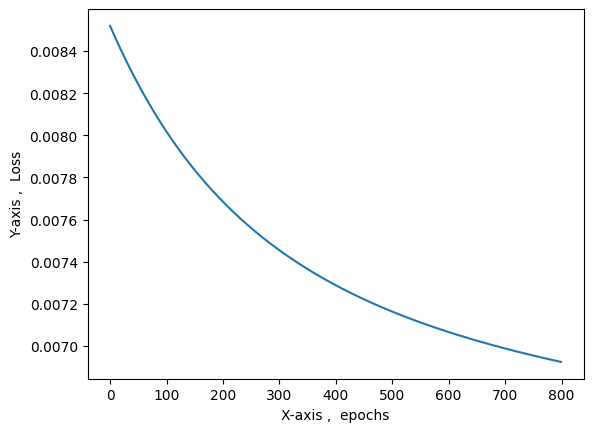

In [ ]:
rnn.train( data[: , :-1] , data[: ,-1] )

In [ ]:
ts_data= pd.DataFrame(X)
ts_data.head()

,0,1,2,3,4,5
0,4.131046e+13,1.608853e+01,3.686298e+16,4.716351e+33,2.150463e-01,2.152052e-01
1,5.910223e+34,8.069013e+18,5.414948e-06,3.251156e+14,7.111508e-06,6.408797e-06
2,4.338903e+08,3.288009e-34,1.578145e-30,8.312346e-08,1.302078e-16,1.122187e+10
3,1.455148e-14,2.030690e-24,3.566097e+32,3.135070e-01,1.691886e+05,1.159946e-24
4,1.860552e-07,1.192445e+06,2.597127e-19,1.782425e+11,1.479848e-08,1.614381e-02


In [ ]:
ts = ts_data.shift(1) + ts_data
ts /= 2
ts

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.955111e+34,4.034506e+18,1.843149e+16,2.358176e+33,1.075267e-01,1.076058e-01
2,2.955111e+34,4.034506e+18,2.707474e-06,1.625578e+14,3.555754e-06,5.610933e+09
3,2.169451e+08,1.015345e-24,1.783048e+32,1.567536e-01,8.459429e+04,5.610933e+09
4,9.302759e-08,5.962226e+05,1.783048e+32,8.912125e+10,8.459429e+04,8.071904e-03
...,...,...,...,...,...,...
75,2.413609e+02,1.880218e+22,5.917553e+10,2.872951e+13,5.429294e-07,1.295119e-12
76,2.741628e+02,1.880213e+22,6.130736e-08,2.872951e+13,1.010970e+42,1.980545e+04
77,3.280191e+01,6.158623e+07,2.584431e+01,1.946058e-01,1.010970e+42,2.580977e+18
78,1.738269e-07,6.158623e+07,2.586138e+01,1.946058e-01,4.077883e+15,2.093091e+30


In [ ]:
Y = np.mean(ts,axis=1)
Y[0] = np.mean(X[0])
Y

,0
0,7.860585e+32
1,5.318215e+33
2,4.925186e+33
3,2.971747e+31
4,2.971747e+31
...,...
75,3.133697e+21
76,1.684949e+41
77,1.684949e+41
78,3.488486e+29


In [ ]:
ts.iloc[0,:] = X[0,]
ts

,0,1,2,3,4,5
0,4.131046e+13,1.608853e+01,3.686298e+16,4.716351e+33,2.150463e-01,2.152052e-01
1,2.955111e+34,4.034506e+18,1.843149e+16,2.358176e+33,1.075267e-01,1.076058e-01
2,2.955111e+34,4.034506e+18,2.707474e-06,1.625578e+14,3.555754e-06,5.610933e+09
3,2.169451e+08,1.015345e-24,1.783048e+32,1.567536e-01,8.459429e+04,5.610933e+09
4,9.302759e-08,5.962226e+05,1.783048e+32,8.912125e+10,8.459429e+04,8.071904e-03
...,...,...,...,...,...,...
75,2.413609e+02,1.880218e+22,5.917553e+10,2.872951e+13,5.429294e-07,1.295119e-12
76,2.741628e+02,1.880213e+22,6.130736e-08,2.872951e+13,1.010970e+42,1.980545e+04
77,3.280191e+01,6.158623e+07,2.584431e+01,1.946058e-01,1.010970e+42,2.580977e+18
78,1.738269e-07,6.158623e+07,2.586138e+01,1.946058e-01,4.077883e+15,2.093091e+30


In [ ]:
ts.insert(len(ts.columns),len(ts.columns),Y)
ts

,0,1,2,3,4,5,6
0,4.131046e+13,1.608853e+01,3.686298e+16,4.716351e+33,2.150463e-01,2.152052e-01,7.860585e+32
1,2.955111e+34,4.034506e+18,1.843149e+16,2.358176e+33,1.075267e-01,1.076058e-01,5.318215e+33
2,2.955111e+34,4.034506e+18,2.707474e-06,1.625578e+14,3.555754e-06,5.610933e+09,4.925186e+33
3,2.169451e+08,1.015345e-24,1.783048e+32,1.567536e-01,8.459429e+04,5.610933e+09,2.971747e+31
4,9.302759e-08,5.962226e+05,1.783048e+32,8.912125e+10,8.459429e+04,8.071904e-03,2.971747e+31
...,...,...,...,...,...,...,...
75,2.413609e+02,1.880218e+22,5.917553e+10,2.872951e+13,5.429294e-07,1.295119e-12,3.133697e+21
76,2.741628e+02,1.880213e+22,6.130736e-08,2.872951e+13,1.010970e+42,1.980545e+04,1.684949e+41
77,3.280191e+01,6.158623e+07,2.584431e+01,1.946058e-01,1.010970e+42,2.580977e+18,1.684949e+41
78,1.738269e-07,6.158623e+07,2.586138e+01,1.946058e-01,4.077883e+15,2.093091e+30,3.488486e+29


In [ ]:
scaled_ts = scaler.fit_transform(ts)

[ = ]  the loss for epoch 1 is  0.008057636762393124
[ == ]  the loss for epoch 2 is  0.0069477598682008345
[ === ]  the loss for epoch 3 is  0.006853982108288168
[ ==== ]  the loss for epoch 4 is  0.006791184755137329
[ ===== ]  the loss for epoch 5 is  0.006747470093872564
[ ====== ]  the loss for epoch 6 is  0.006715291391462415
[ ======= ]  the loss for epoch 7 is  0.0066903064574946455
[ ======== ]  the loss for epoch 8 is  0.006670170049466736
[ ========= ]  the loss for epoch 9 is  0.0066542966359733205
[ ========== ]  the loss for epoch 10 is  0.006641364360278651
[ =========== ]  the loss for epoch 11 is  0.00662977384805305
[ ============ ]  the loss for epoch 12 is  0.00661843440059632
[ ============= ]  the loss for epoch 13 is  0.006607895041225597
[ ============== ]  the loss for epoch 14 is  0.006598545317273746
[ =============== ]  the loss for epoch 15 is  0.006590112632614184
[ ================ ]  the loss for epoch 16 is  0.006582442382361539
[ ================= ]  t

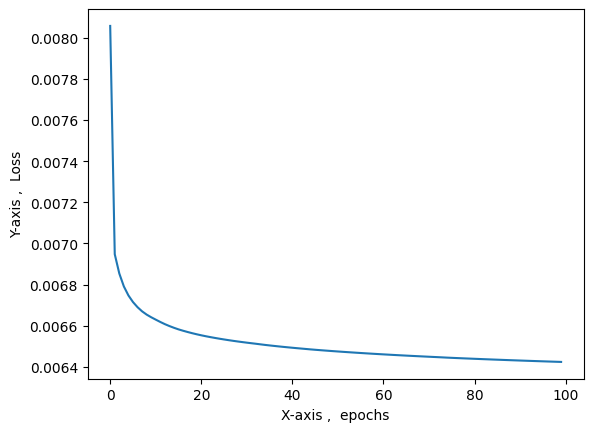

In [ ]:
rnn = RNN(learning_rate=884e-1,epochs=100,hidden_units=240)
rnn.train(scaled_ts[:,:-1] , scaled_ts[:,-1])

# 3. REAL TIME RECURRENT LEARNING

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
class RNN_RTRL:
    def __init__(self,n_features,learning_rate=0.01,hidden_units=10):
        self.learning_rate= learning_rate
        self.hidden_units=hidden_units
        self.cache = {}
        limit = np.sqrt( 6 / ( n_features+self.hidden_units ))
        self.hidden_weights = np.random.uniform(-limit, limit, (self.hidden_units , self.hidden_units) )

        self.input_weights = np.random.uniform(-limit, limit , ( self.hidden_units, n_features) )

    def loss(self, predicted , target):
        return (1/2*self.hidden_units) * np.square(target - predicted)

    def sigmoid(self, X):
        return 1/(1+np.exp(-X))

    def train(self,X , target ):
        """trains real time recurrent logic"""
        self.cache.clear()


        self.X = X

        self.target = target

        #for simplicity we assume offline learning

        self.timesteps , n_features = self.X.shape

        # limit = np.sqrt( 6 / ( n_features+self.hidden_units ))

        """

        Glorot init Draws samples from a uniform distribution within `[-limit, limit]`, where
        `limit = sqrt(6 / (fan_in + fan_out))` (`fan_in` is the number of input

        """


        #sensitivity matrices
        self.sensitivity_tensor = np.zeros(shape=(self.hidden_units ,self.hidden_units , self.hidden_units))

        self.hidden_state = np.zeros(self.hidden_units)

        self.activation = np.zeros(self.hidden_units)

        self.cache["activations"] = [self.activation ]
        self.cache["losses"] = []

        sigmoid_derivative = lambda activation: activation * (1 - activation)

        self.gradients = np.zeros( (self.hidden_units , self.hidden_units) )

        for timestep in range(self.timesteps):

            self.hidden_state = np.dot(self.input_weights , self.X[timestep] ) + np.dot(self.hidden_weights , self.activation)

            self.activation = self.sigmoid( self.hidden_state )

            #computing gradients
            error = self.target[timestep] - self.activation

            loss  = self.loss(self.activation, self.target[timestep] )

            self.cache["losses"].append( np.mean(loss) )

            for u in range(self.hidden_units):
                for v in range(self.hidden_units):
                    temp = self.cache["activations"][-1][u] + np.dot( self.hidden_weights , self.sensitivity_tensor[u][v] )

                    self.sensitivity_tensor[u][v] = np.multiply( sigmoid_derivative(self.activation) , temp)

                    self.gradients[u][v] += np.dot(error, self.sensitivity_tensor[u][v])

            self.hidden_weights += self.gradients  * self.learning_rate

            self.cache["activations"].append( self.activation )
            print( f"\t the loss for timestep {timestep} is: {np.mean(loss)}")


        plt.plot( range(self.timesteps) , self.cache["losses"] )

        plt.xlabel('X-axis ,  timestep')

        plt.ylabel('Y-axis ,  Loss')

        plt.savefig(f"loss{str(datetime.datetime.now()).replace('.','-').replace(':','-')}.pdf")








In [ ]:
rtrl = RNN_RTRL(n_features=scaled_ts.shape[-1]-1)

In [ ]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()

In [ ]:
np.random.seed(42)
X = data.data
Y = data.target
df = pd.DataFrame(X)
df.iloc[: ,-1] = Y
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [ ]:
len(scaled_ts)

80

Streaming output truncated to the last 5000 lines.
	 the loss for timestep 40 is: 0.5261118052446884
	 the loss for timestep 41 is: 0.6003708346496085
	 the loss for timestep 42 is: 0.5022699281840081
	 the loss for timestep 43 is: 0.6439981974488684
	 the loss for timestep 44 is: 0.45870942845574547
	 the loss for timestep 45 is: 0.6854021897494187
	 the loss for timestep 46 is: 0.4279760697106297
	 the loss for timestep 47 is: 0.7725332817861984
	 the loss for timestep 48 is: 0.46447039339659674
	 the loss for timestep 49 is: 0.7918128687923905
	 the loss for timestep 50 is: 0.4005099479432671
	 the loss for timestep 51 is: 0.8716191316021608
	 the loss for timestep 52 is: 0.36663642799377366
	 the loss for timestep 53 is: 0.9811703514857811
	 the loss for timestep 54 is: 0.3497610655501199
	 the loss for timestep 55 is: 1.0684164499164954
	 the loss for timestep 56 is: 0.35434378052197185
	 the loss for timestep 57 is: 1.100293402994383
	 the loss for timestep 58 is: 0.3833757434569

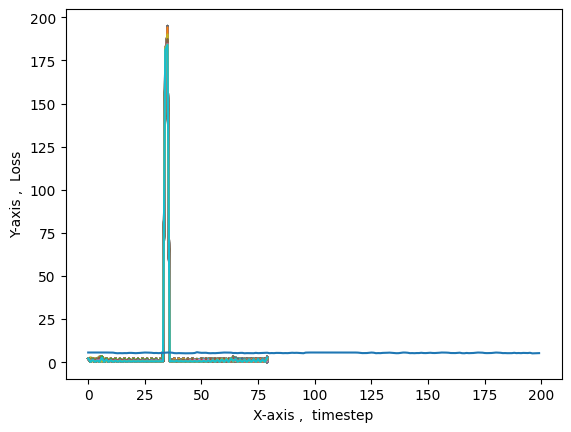

In [ ]:
loss_rtrl = []
for _ in range(200):
  rtrl.train(scaled_ts[:,:-1] , scaled_ts[:,-1])
  loss_rtrl.append(np.mean(rtrl.cache['losses']))
plt.plot(loss_rtrl)

In [ ]:
len(rtrl.cache['losses'])

80

In [ ]:
plt.plot(loss_rtrl)

In [ ]:
def exp_smooth_loss(losses, beta=0.9):
    """Exponentially weighted moving average."""
    smoothed = []
    last = 0
    for i, val in enumerate(losses):
        last = last * beta + (1 - beta) * val
        smoothed_val = last / (1 - beta**(i + 1))  # bias-corrected
        smoothed.append(smoothed_val)
    return np.array(smoothed)

smoothed_losses_exp = exp_smooth_loss(loss_rtrl, beta=0.9)

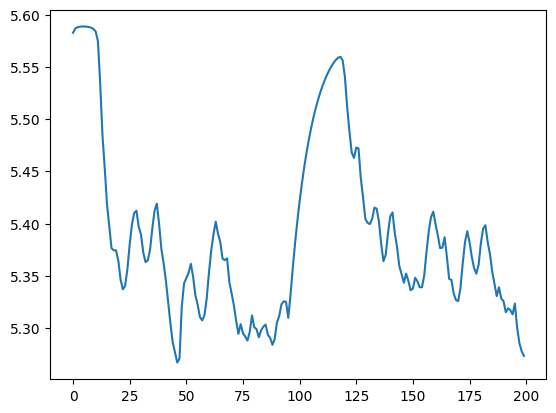

In [ ]:
plt.plot(smoothed_losses_exp)

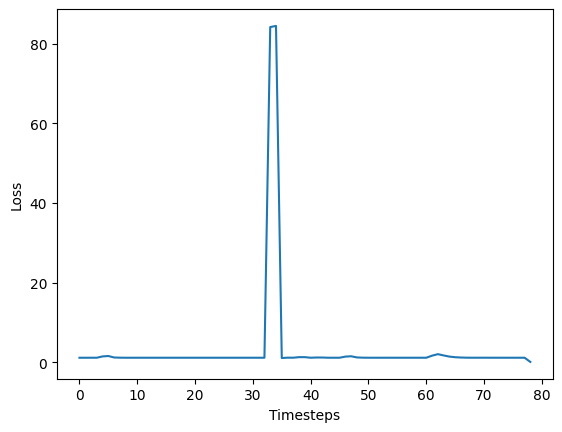

In [ ]:
timesteps = len(rtrl.cache['losses'][1:] )
plt.plot( range(timesteps) , [np.mean(a) for a in rtrl.cache['losses'][1:] ])
# rtrl.cache['activations'][1:]
plt.xlabel('Timesteps')
plt.ylabel('Loss')
t = datetime.datetime.now()
h = t.hour
m = t.minute
s = t.second
plt.savefig(f"RNN_RTRL_Loss_plot_{h}_{m}_{s}.pdf")

# Possible causes of fluctuating losses are:


>1.batch size,
>
>2.learning rate ,
>
>3.Conflicting error signals problem.


# 4. LSTM CELLS

the vanishing/exploding error happens because of interdependence between error signals. As each error signal depends on previous one from succeeding layer in an unrolled network, this creates a chain rule product over multiple timesteps.
As a result if each product is greater than 1 gradients will explode otherwise if less than 1 gradients will vanish.


LSTM cells fix this issue by introducing CEC and forget gates????   [^1]

[^1]:https://arxiv.org/pdf/1909.09586

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import Normalizer,MinMaxScaler,PowerTransformer,StandardScaler,RobustScaler
data=fetch_california_housing()

In [ ]:
np.random.seed(42)
X = data.data
Y = data.target
df = pd.DataFrame(X)
df.iloc[: ,-1] = Y
scaler = Normalizer()
df = scaler.fit_transform(df)

In [ ]:
class LSTM:
    def __init__(self, learning_rate=5e-7, hidden_units=10 ):
        self.learning_rate  = learning_rate
        self.hidden_units   = hidden_units
        self.params         = {}
        self.losses         = []

    def sigmoid(self, X):
        return 1/ (1+ np.exp(-X))

    #This tang squashes the cell input between -2 and 2
    def hp_tang(self, X):
        return (4 * self.sigmoid( X ) - 2 )

    def loss( self , error):
        return 1/2 * ( error ) ** 2
    #hidden_units refer to memory cells
    def train(self,X,Y,learning_rate=0.005, hidden_units=100 ):
        self.learning_rate = learning_rate
        self.hidden_units  = hidden_units

        self.timesteps , n_features = X.shape

        self.X = X
        self.Y = Y
        _,*dimsout = Y.shape
        n_out = (self.hidden_units,) if len(self.Y.shape) ==1 else ( self.hidden_units,*dimsout )
        #weight inits
        limit = np.sqrt( 6 / ( n_features+self.hidden_units ))
        limitU = np.sqrt( 6 / ( self.hidden_units+self.hidden_units ))
        limitO = np.sqrt( 6 / ( 1 if len(self.Y.shape) ==1 else dimsout[0]+self.hidden_units ))
        """

        Glorot init Draws samples from a uniform distribution within `[-limit, limit]`, where
        `limit = sqrt(6 / (fan_in + fan_out))` (`fan_in` is the number of input

        """
        #input weights
        self.params['Wf'] = np.random.uniform(0, limit, (self.hidden_units , n_features) )
        self.params['Wi'] = np.random.uniform(-limit, -0.0001, (self.hidden_units , n_features) )
        self.params['Wo'] = np.random.uniform(-limit, -0.0001, (self.hidden_units , n_features) )
        self.params['Wc'] = np.random.uniform(-limit, limit, (self.hidden_units , n_features) )
        self.params['Wk'] = np.random.uniform(-limitO, limitO, self.hidden_units  )
        #hidden weights
        self.params['Uf'] = np.random.uniform(0, limitU, (self.hidden_units , self.hidden_units) )
        self.params['Ui'] = np.random.uniform(-limitU, limitU, (self.hidden_units , self.hidden_units) )
        self.params['Uo'] = np.random.uniform(-limitU, limitU, (self.hidden_units , self.hidden_units) )
        self.params['Uc'] = np.random.uniform(-limitU, limitU, (self.hidden_units , self.hidden_units) )
        #bias
        self.params['bf'] = 1#np.random.uniform(0, limit, self.hidden_units )
        self.params['bi'] = np.random.uniform(-limitU, -0.0001, self.hidden_units )
        self.params['bo'] = np.random.uniform(-limitU, -0.0001, self.hidden_units )
        self.params['bc'] = np.random.uniform(-limitU, limitU, self.hidden_units )

        #Ht
        self.hidden_state          = np.zeros(self.hidden_units)

        #~Ct
        self.cell_input_activation = np.zeros(self.hidden_units)

        #Ot
        self.output_activation     = np.zeros(self.hidden_units)

        #Ft
        self.forget_activation     = np.zeros(self.hidden_units)

        #It
        self.input_activation      = np.zeros(self.hidden_units)

        #Ct
        self.cell_state            = np.zeros(self.hidden_units)

        self.final_output          = np.zeros(shape=tuple(n_out))

        sigmoid_derivative         = lambda x: x * (1 - x)

        hp_tang_derivative         = lambda x: 4 * self.sigmoid(x)

        loss_function              = lambda error: 1/2 * (error)**2

        self.error_signal_final_out = np.zeros(self.hidden_units)

        self.error_signal_out_gate  = np.zeros(self.hidden_units)

        cell_input_partials_Wc = cell_input_partials_Uc = cell_input_partials_Wi = cell_input_partials_Ui = cell_input_partials_Wf = cell_input_partials_Uf = 0

        #iterating over sequence
        for timestep in range(self.timesteps):
            # print(timestep)
            self.forget_activation     = self.sigmoid( np.dot(self.params['Wf'] , self.X[timestep] ) + np.dot( self.params['Uf'] , self.hidden_state ) + self.params['bf'] )

            self.input_activation      = self.sigmoid( np.dot(self.params['Wi'] , self.X[timestep] ) + np.dot( self.params['Ui'] , self.hidden_state ) + self.params['bi'] )

            self.output_activation     = self.sigmoid( np.dot(self.params['Wo'] , self.X[timestep] ) + np.dot( self.params['Uo'] , self.hidden_state ) + self.params['bo'] )

            self.cell_input_activation = self.hp_tang( np.dot(self.params['Wc'] , self.X[timestep] ) + np.dot( self.params['Uc'] , self.hidden_state ) + self.params['bc'] )

            prev_cell_state            = self.cell_state

            self.cell_state            = np.multiply( self.forget_activation , self.cell_state) + np.multiply( self.input_activation , self.cell_input_activation)

            prev_hidden_state          = self.hidden_state

            self.hidden_state          = np.multiply( self.output_activation , np.tanh( self.cell_state ) )

            self.final_output          = self.sigmoid( np.dot( self.params['Wk'] , self.hidden_state  ) )

            #BPTT for output units and output gates pass

            error = self.Y[timestep] -  self.final_output

            self.error_signal_out_units = sigmoid_derivative(self.final_output) * error

            self.error_signal_out_gate = sigmoid_derivative(self.output_activation) * (  np.multiply( self.hp_tang( self.cell_state ) , np.dot( self.params['Wk'] , self.error_signal_out_units  )  ) )

            #I need the previous hidden state

            output_unit_gradient = np.outer(  self.error_signal_out_units , prev_hidden_state )

            if len(self.Y.shape) ==1:
                output_unit_gradient = output_unit_gradient[0]

            self.params['Wk']  += self.learning_rate * output_unit_gradient

            #BPTT for output gate

            self.params['Uo']  += self.learning_rate * np.outer(  self.error_signal_out_gate , prev_hidden_state)

            self.params['Wo']  += self.learning_rate * np.outer(  self.error_signal_out_gate , self.X[timestep])


            #for input gates, cell and forget gates we use RTRl
            #before np.outer we elementwise multiply by internal state error.

            internal_state_error              = self.output_activation * 2 * self.sigmoid(self.cell_state) * np.dot( self.params['Wk'] , self.error_signal_out_units )

            cell_input_activation_partials_Wc = np.outer( internal_state_error * cell_input_partials_Wc * self.forget_activation + hp_tang_derivative( self.cell_input_activation ) * self.input_activation ,  self.X[timestep] )

            cell_input_activation_partials_Uc = np.outer( internal_state_error *cell_input_partials_Uc * self.forget_activation + hp_tang_derivative( self.cell_input_activation ) * self.input_activation , prev_hidden_state  )


            cell_igate_activation_partials_Wi = np.outer( internal_state_error *cell_input_partials_Wi * self.forget_activation + sigmoid_derivative(self.input_activation)  * self.cell_input_activation , self.X[timestep] )

            cell_igate_activation_partials_Ui = np.outer( internal_state_error *cell_input_partials_Ui * self.forget_activation + sigmoid_derivative(self.input_activation)  * self.cell_input_activation , prev_hidden_state )


            cell_forget_activation_partial_Wf = np.outer( internal_state_error *cell_input_partials_Wf * self.forget_activation + prev_cell_state * sigmoid_derivative(self.forget_activation) * self.input_activation , self.X[timestep] )

            cell_forget_activation_partial_Uf = np.outer( internal_state_error *cell_input_partials_Uf * self.forget_activation + prev_cell_state * sigmoid_derivative(self.forget_activation) , prev_hidden_state )

            #input weights
            self.params['Wf'] -= self.learning_rate * cell_forget_activation_partial_Wf
            self.params['Wi'] -= self.learning_rate * cell_igate_activation_partials_Wi
            self.params['Wc'] -= self.learning_rate * cell_input_activation_partials_Wc

            #hidden weights
            self.params['Uf'] -= self.learning_rate * cell_forget_activation_partial_Uf
            self.params['Ui'] -= self.learning_rate * cell_igate_activation_partials_Ui
            self.params['Uc'] -= self.learning_rate * cell_input_activation_partials_Uc
            self.losses.append( np.mean( self.loss( error ) ))

            #self.params['bf'] += self.learning_rate *  internal_state_error
            self.params['bi'] += self.learning_rate *  internal_state_error
            self.params['bo'] += self.learning_rate *  self.error_signal_out_gate
            self.params['bc'] += self.learning_rate *  internal_state_error

        plt.plot( range(len(self.losses)) , self.losses )
        plt.xlabel('timesteps')
        plt.ylabel('Loss')



In [ ]:
lstm = LSTM()

/tmp/ipython-input-2817445183.py:9: RuntimeWarning: overflow encountered in exp
  return 1/ (1+ np.exp(-X))


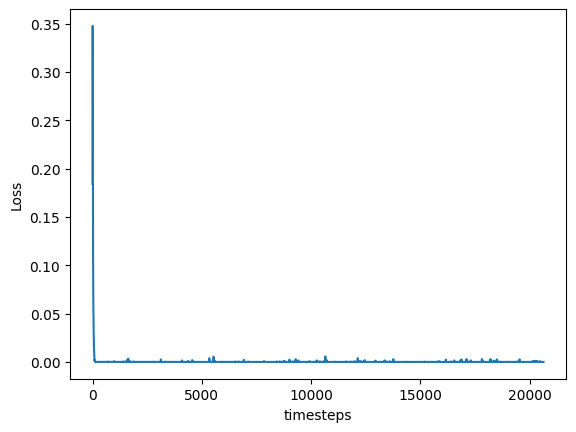

In [ ]:
lstm.train(df[:,:-1] , df[:,-1])